In [1]:
# default_exp data

# Import

In [2]:
#export
from fastai.vision import *

# Config

In [3]:
#export
dir_data = Path('/home/blaberj/justinblaber/deoldify/data')
dir_imgs = dir_data/'imgs'
dir_colr = dir_imgs/'colr'
dir_gray = dir_imgs/'gray'

# Utility

In [4]:
#export
def denorm(img): 
    sdev = torch.tensor([0.229, 0.224, 0.225], device=img.device, dtype=img.dtype)[None,:,None,None]
    mean = torch.tensor([0.485, 0.456, 0.406], device=img.device, dtype=img.dtype)[None,:,None,None]
    return img*sdev+mean

In [5]:
#export
def torch2np(img): return img.permute(0,2,3,1).detach().cpu().numpy()

In [6]:
#export
def rgb2gray(img):
    return 0.299*img[:,0,:,:]+0.587*img[:,1,:,:]+0.114*img[:,2,:,:] # Same as pillow L conversion

# Data

In [7]:
#export
def get_src(subset=None):
    iil = ImageImageList.from_folder(dir_gray)
    if subset is not None:
        iil = iil[:subset]
    return iil.split_by_rand_pct(0.1, seed=0)

In [8]:
#export
def get_data(src, batch_size, sz):
    data = (src.label_from_func(lambda x: dir_colr/x.name)
               .transform(get_transforms(max_zoom=2.), size=sz, tfm_y=True)
               .databunch(bs=batch_size)
               .normalize(imagenet_stats, do_y=True))
    data.c = 3
    return data

# Test

In [9]:
src = get_src(100)

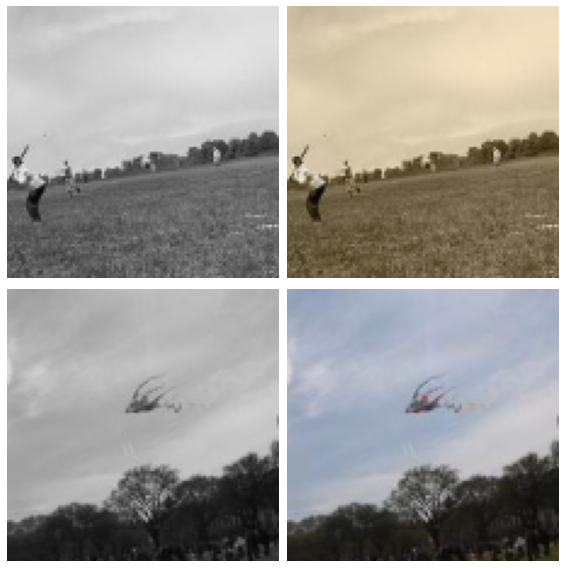

In [10]:
data = get_data(src, 16, 112)
data.show_batch(rows=2)

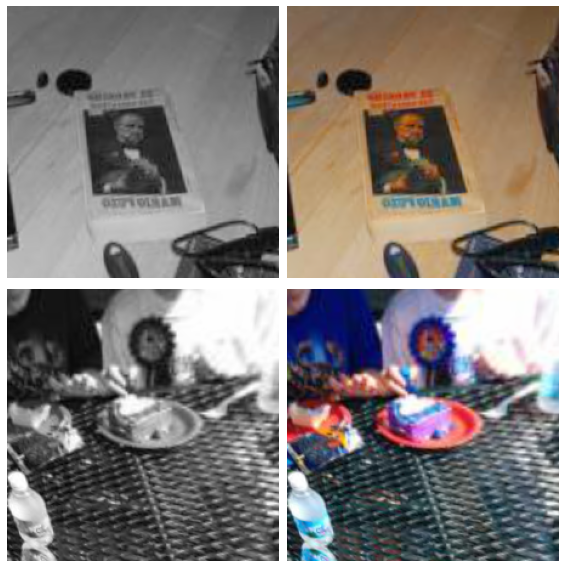

In [11]:
data = get_data(src, 16, 224)
data.show_batch(rows=2)

# Build

In [12]:
!nbdev_build_lib

Converted data.ipynb.
Converted format_images.ipynb.
Converted models.ipynb.
